## Basline SVM model By Lucky Chen


The SVC (Support Vector Classifier) in scikit-learn supports multiple types of kernels. Here are some commonly used kernel types in SVC:

1. Linear Kernel: The linear kernel is a simple and efficient kernel that works well when the data is linearly separable.

2. Polynomial Kernel: The polynomial kernel allows for non-linear decision boundaries by mapping the data into a higher-dimensional space using polynomial functions.

3. Radial Basis Function (RBF) Kernel: The RBF kernel is a popular choice for non-linear classification problems. It uses a Gaussian function to map the data into an infinite-dimensional space.

4. Sigmoid Kernel: The sigmoid kernel is another non-linear kernel that maps the data into a higher-dimensional space using a sigmoid function.

These are just a few examples of the kernel types supported by SVC. Each kernel has its own characteristics and is suitable for different types of data and classification problems.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = '/content/features_3_sec.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(['filename', 'length', 'label'], axis=1)  # Drop non-feature columns
y = data['label']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# # on linear kernel
# # Initialize and train the SVM classifier
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

# # Predictions and evaluation
# y_pred = model.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# # on rbf kernel; non-linear SVM
# # Initialize and train the SVM classifier
# model = SVC(kernel='rbf')
# model.fit(X_train, y_train)

# # Predictions and evaluation
# y_pred = model.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
# # on polynomial kernel; non-linear SVM
# # Initialize and train the SVM classifier
# model = SVC(kernel='poly')
# model.fit(X_train, y_train)

# # Predictions and evaluation
# y_pred = model.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
# on sigmoid kernel; non-linear SVM
# Initialize and train the SVM classifier
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
# Predictions and evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[410  42  55  24  40  61  82   5  51  22]
 [  7 621  50   2   0  77   0   5  14  19]
 [143  84 315  23  27  48  12  54  37  68]
 [ 46  22  17 301  99  10  56 156  17  76]
 [ 33   8   6 131 265   0  60 186  84   7]
 [ 59 181  51  16   1 424   3  22  17  34]
 [ 24   3  14  60  32   0 631   0  12  20]
 [  3  10  38 164  27   4   0 537  21  16]
 [ 77  30  26  52 154  19  12 136 261  22]
 [129  24  76  94  44  35  97  54  41 207]]
              precision    recall  f1-score   support

       blues       0.44      0.52      0.48       792
   classical       0.61      0.78      0.68       795
     country       0.49      0.39      0.43       811
       disco       0.35      0.38      0.36       800
      hiphop       0.38      0.34      0.36       780
        jazz       0.63      0.52      0.57       808
       metal       0.66      0.79      0.72       796
         pop       0.46      0.65      0.54       820
      reggae       0.47      0.33      0.39       789
        rock       0.42     

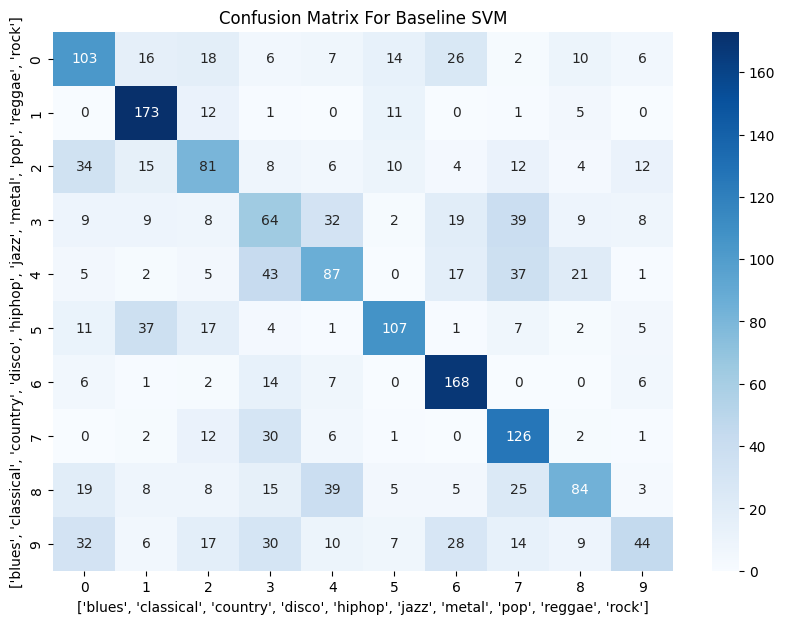

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
classes = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]  # Replace with your actual class names

# Assuming y_test and y_pred are defined
matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix For Baseline SVM')
plt.xlabel(classes)
plt.ylabel(classes)
plt.savefig('confusion_matrix.png')  # Save the figure
plt.show()


ValueError: ignored

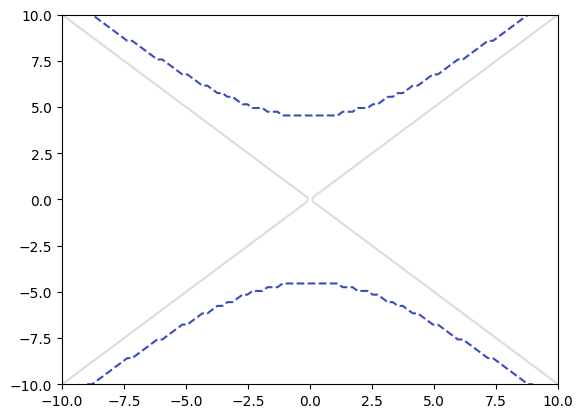

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Let's create a grid of points that will simulate our feature space
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Now we simulate the decision function of an SVM with a sigmoid kernel.
# The decision function will not be a simple line, but rather a non-linear function.
# We can use a tanh function to simulate this, as the sigmoid kernel is related to the tanh function.
Z = np.tanh(X**2 - Y**2)

# Plot the decision boundary and margins
contour = plt.contour(X, Y, Z, levels=[-1, 0, 1], cmap=plt.cm.coolwarm, linestyles=['--', '-', '--'])
plt.scatter(0, 0, marker='o', c='white', s=100) # Example Support Vector

# Label the decision boundary
midpoint = (contour.levels[1] - contour.levels[0]) / 2 + contour.levels[0]
plt.clabel(contour, [midpoint], fmt={midpoint: 'Decision Boundary'}, inline=True)

# Set the aspect to be equal, so the x and y axis are scaled equally
plt.axis('equal')

# Set limits
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Add title and labels to the axes
plt.title('Non-linear SVM with Sigmoid Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Remove the ticks from the axes
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()
